# Udacity Data Analysis Project

## Analysing TMDB Movie Dataset For Insights And Recommendation

In this project, we will be analysing the collected dataset of about 10,000 movies for review patterns, insights that will lead to recommendation or prediction even further. We will be using basic python analytical libraries - Pandas, Numpy and Matplotlib (Seaborne for finesse).

In [1]:
# Importing libraries and data

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Processing

In [2]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
movie_df.shape

(10866, 21)

From the above, we can see there are missing values. We will delete all the rows with missing data in cast, director, overview, genres. The mising data in the columns homepage, tagline, keywords, production_companieswill be replaced with None. The columns id and imbd_id will be deleted.

In [4]:
# Replacing with None
movie_df[['homepage', 'tagline', 'keywords', 'production_companies']] = movie_df[['homepage', 'tagline', 'keywords', 'production_companies']].fillna('None')


In [5]:
# Removing missing data
movie_df = movie_df.dropna(axis = 0)


In [6]:
# deleting irrelevant columns
movie_df.drop(['id', 'imdb_id', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [7]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10725 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10725 non-null  float64
 1   budget                10725 non-null  int64  
 2   revenue               10725 non-null  int64  
 3   original_title        10725 non-null  object 
 4   cast                  10725 non-null  object 
 5   homepage              10725 non-null  object 
 6   director              10725 non-null  object 
 7   tagline               10725 non-null  object 
 8   keywords              10725 non-null  object 
 9   overview              10725 non-null  object 
 10  runtime               10725 non-null  int64  
 11  genres                10725 non-null  object 
 12  production_companies  10725 non-null  object 
 13  release_date          10725 non-null  object 
 14  vote_count            10725 non-null  int64  
 15  vote_average       

In [8]:
movie_df.head()

,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [9]:
# The columns cast, keywords, genres, production_companies all have multiple items.
# For cast, we will split to 2 columns - main cast and supporting cast, then discard the rest
# For keywords, genres, and production_company, We will take the first 2 item too

for i in ['cast', 'keywords', 'genres', 'production_companies']:
    movie_df[i] = movie_df[i].str.split("|").tolist()

movie_df.head()

,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,"[monster, dna, tyrannosaurus rex, velociraptor...",Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,"[future, chase, post-apocalyptic, dystopia, au...",An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,"[based on novel, revolution, dystopia, sequel,...",Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,"[android, spaceship, jedi, space opera, 3d]",Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,James Wan,Vengeance Hits Home,"[car race, speed, revenge, suspense, car]",Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",4/1/15,2947,7.3,2015


In [10]:
movie_df.shape

(10725, 17)

In [11]:
new_df = pd.DataFrame(np.zeros((movie_df.shape[0], 1)))
for j in ['cast', 'keywords', 'genres', 'production_companies']:
    temp_df = movie_df[j].apply(','.join).str.split(",", expand=True)
    temp_df = temp_df.iloc[:,0:2]
    column1 = f'{j}_1'
    column2 = f'{j}_2'
    temp_df.rename(columns={0: column1, 1: column2}, inplace=True)
    new_df = pd.concat([new_df.reset_index(drop=True), temp_df.reset_index(drop=True)], axis=1)
    
new_df.drop(0, axis=1, inplace=True)
new_df

,cast_1,cast_2,keywords_1,keywords_2,genres_1,genres_2,production_companies_1,production_companies_2
0,Chris Pratt,Bryce Dallas Howard,monster,dna,Action,Adventure,Universal Studios,Amblin Entertainment
1,Tom Hardy,Charlize Theron,future,chase,Action,Adventure,Village Roadshow Pictures,Kennedy Miller Productions
2,Shailene Woodley,Theo James,based on novel,revolution,Adventure,Science Fiction,Summit Entertainment,Mandeville Films
3,Harrison Ford,Mark Hamill,android,spaceship,Action,Adventure,Lucasfilm,Truenorth Productions
4,Vin Diesel,Paul Walker,car race,speed,Action,Crime,Universal Pictures,Original Film
...,...,...,...,...,...,...,...,...
10720,Michael Hynson,Robert August,surfer,surfboard,Documentary,None,Bruce Brown Films,None
10721,James Garner,Eva Marie Saint,car race,racing,Action,Adventure,Cherokee Productions,Joel Productions
10722,Innokentiy Smoktunovskiy,Oleg Efremov,car,trolley,Mystery,Comedy,Mosfilm,None
10723,Tatsuya Mihashi,Akiko Wakabayashi,spoof,None,Action,Comedy,Benedict Pictures Corp.,None


In [12]:
# concat with movie_df

movie_df = pd.concat([movie_df.reset_index(drop=True), new_df.reset_index(drop=True)], axis=1)

movie_df.drop(['cast', 'keywords', 'genres', 'production_companies'], axis=1, inplace=True)
movie_df.head()

,popularity,budget,revenue,original_title,homepage,director,tagline,overview,runtime,release_date,...,vote_average,release_year,cast_1,cast_2,keywords_1,keywords_2,genres_1,genres_2,production_companies_1,production_companies_2
0,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,6/9/15,...,6.5,2015,Chris Pratt,Bryce Dallas Howard,monster,dna,Action,Adventure,Universal Studios,Amblin Entertainment
1,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,5/13/15,...,7.1,2015,Tom Hardy,Charlize Theron,future,chase,Action,Adventure,Village Roadshow Pictures,Kennedy Miller Productions
2,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,3/18/15,...,6.3,2015,Shailene Woodley,Theo James,based on novel,revolution,Adventure,Science Fiction,Summit Entertainment,Mandeville Films
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,12/15/15,...,7.5,2015,Harrison Ford,Mark Hamill,android,spaceship,Action,Adventure,Lucasfilm,Truenorth Productions
4,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,4/1/15,...,7.3,2015,Vin Diesel,Paul Walker,car race,speed,Action,Crime,Universal Pictures,Original Film


In [13]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10725 entries, 0 to 10724
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   popularity              10725 non-null  float64
 1   budget                  10725 non-null  int64  
 2   revenue                 10725 non-null  int64  
 3   original_title          10725 non-null  object 
 4   homepage                10725 non-null  object 
 5   director                10725 non-null  object 
 6   tagline                 10725 non-null  object 
 7   overview                10725 non-null  object 
 8   runtime                 10725 non-null  int64  
 9   release_date            10725 non-null  object 
 10  vote_count              10725 non-null  int64  
 11  vote_average            10725 non-null  float64
 12  release_year            10725 non-null  int64  
 13  cast_1                  10725 non-null  object 
 14  cast_2                  10588 non-null

In [14]:
# chganging the data type of the release date to a proper date 
movie_df['release_date'] = pd.to_datetime(movie_df['release_date']).dt.date

In [15]:
# The new columns we introduced has some empty/Nan values. We will replace them with None

movie_df = movie_df.fillna('None')

In [16]:
movie_df.head()

,popularity,budget,revenue,original_title,homepage,director,tagline,overview,runtime,release_date,...,vote_average,release_year,cast_1,cast_2,keywords_1,keywords_2,genres_1,genres_2,production_companies_1,production_companies_2
0,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,2015-06-09,...,6.5,2015,Chris Pratt,Bryce Dallas Howard,monster,dna,Action,Adventure,Universal Studios,Amblin Entertainment
1,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,2015-05-13,...,7.1,2015,Tom Hardy,Charlize Theron,future,chase,Action,Adventure,Village Roadshow Pictures,Kennedy Miller Productions
2,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,2015-03-18,...,6.3,2015,Shailene Woodley,Theo James,based on novel,revolution,Adventure,Science Fiction,Summit Entertainment,Mandeville Films
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,2015-12-15,...,7.5,2015,Harrison Ford,Mark Hamill,android,spaceship,Action,Adventure,Lucasfilm,Truenorth Productions
4,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,2015-04-01,...,7.3,2015,Vin Diesel,Paul Walker,car race,speed,Action,Crime,Universal Pictures,Original Film


## Data Analysis

In [17]:
# creating new column profit
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']

movie_df.head()

,popularity,budget,revenue,original_title,homepage,director,tagline,overview,runtime,release_date,...,release_year,cast_1,cast_2,keywords_1,keywords_2,genres_1,genres_2,production_companies_1,production_companies_2,profit
0,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,2015-06-09,...,2015,Chris Pratt,Bryce Dallas Howard,monster,dna,Action,Adventure,Universal Studios,Amblin Entertainment,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,2015-05-13,...,2015,Tom Hardy,Charlize Theron,future,chase,Action,Adventure,Village Roadshow Pictures,Kennedy Miller Productions,228436354
2,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,2015-03-18,...,2015,Shailene Woodley,Theo James,based on novel,revolution,Adventure,Science Fiction,Summit Entertainment,Mandeville Films,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,2015-12-15,...,2015,Harrison Ford,Mark Hamill,android,spaceship,Action,Adventure,Lucasfilm,Truenorth Productions,1868178225
4,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,2015-04-01,...,2015,Vin Diesel,Paul Walker,car race,speed,Action,Crime,Universal Pictures,Original Film,1316249360


Question 1: What kinds of properties are associated with movies that have high revenues?

In [18]:
mean_revenue = round(movie_df['revenue'].mean(), 2)
mean_revenue

40342534.33

In [19]:
high_rev_df = movie_df.query(f'revenue > {mean_revenue}')
high_rev_df.head()

,popularity,budget,revenue,original_title,homepage,director,tagline,overview,runtime,release_date,...,release_year,cast_1,cast_2,keywords_1,keywords_2,genres_1,genres_2,production_companies_1,production_companies_2,profit
0,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,2015-06-09,...,2015,Chris Pratt,Bryce Dallas Howard,monster,dna,Action,Adventure,Universal Studios,Amblin Entertainment,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,2015-05-13,...,2015,Tom Hardy,Charlize Theron,future,chase,Action,Adventure,Village Roadshow Pictures,Kennedy Miller Productions,228436354
2,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,2015-03-18,...,2015,Shailene Woodley,Theo James,based on novel,revolution,Adventure,Science Fiction,Summit Entertainment,Mandeville Films,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,2015-12-15,...,2015,Harrison Ford,Mark Hamill,android,spaceship,Action,Adventure,Lucasfilm,Truenorth Productions,1868178225
4,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,2015-04-01,...,2015,Vin Diesel,Paul Walker,car race,speed,Action,Crime,Universal Pictures,Original Film,1316249360


In [20]:
# Setting up visualization

plt.rcParams["figure.figsize"] = [10, 6]

# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [21]:
for category in ['budget', 'vote_count', 'profit', 'cast_1', 'genres_1', 'production_companies_1']:
    display(high_rev_df[['original_title', 'revenue', f'{category}']].sort_values('revenue', ascending=False, ignore_index=True).head(10))
    

,original_title,revenue,budget
0,Avatar,2781505847,237000000
1,Star Wars: The Force Awakens,2068178225,200000000
2,Titanic,1845034188,200000000
3,The Avengers,1519557910,220000000
4,Jurassic World,1513528810,150000000
5,Furious 7,1506249360,190000000
6,Avengers: Age of Ultron,1405035767,280000000
7,Harry Potter and the Deathly Hallows: Part 2,1327817822,125000000
8,Frozen,1274219009,150000000
9,Iron Man 3,1215439994,200000000


,original_title,revenue,vote_count
0,Avatar,2781505847,8458
1,Star Wars: The Force Awakens,2068178225,5292
2,Titanic,1845034188,4654
3,The Avengers,1519557910,8903
4,Jurassic World,1513528810,5562
5,Furious 7,1506249360,2947
6,Avengers: Age of Ultron,1405035767,4304
7,Harry Potter and the Deathly Hallows: Part 2,1327817822,3750
8,Frozen,1274219009,3369
9,Iron Man 3,1215439994,6882


,original_title,revenue,profit
0,Avatar,2781505847,2544505847
1,Star Wars: The Force Awakens,2068178225,1868178225
2,Titanic,1845034188,1645034188
3,The Avengers,1519557910,1299557910
4,Jurassic World,1513528810,1363528810
5,Furious 7,1506249360,1316249360
6,Avengers: Age of Ultron,1405035767,1125035767
7,Harry Potter and the Deathly Hallows: Part 2,1327817822,1202817822
8,Frozen,1274219009,1124219009
9,Iron Man 3,1215439994,1015439994


,original_title,revenue,cast_1
0,Avatar,2781505847,Sam Worthington
1,Star Wars: The Force Awakens,2068178225,Harrison Ford
2,Titanic,1845034188,Kate Winslet
3,The Avengers,1519557910,Robert Downey Jr.
4,Jurassic World,1513528810,Chris Pratt
5,Furious 7,1506249360,Vin Diesel
6,Avengers: Age of Ultron,1405035767,Robert Downey Jr.
7,Harry Potter and the Deathly Hallows: Part 2,1327817822,Daniel Radcliffe
8,Frozen,1274219009,Kristen Bell
9,Iron Man 3,1215439994,Robert Downey Jr.


,original_title,revenue,genres_1
0,Avatar,2781505847,Action
1,Star Wars: The Force Awakens,2068178225,Action
2,Titanic,1845034188,Drama
3,The Avengers,1519557910,Science Fiction
4,Jurassic World,1513528810,Action
5,Furious 7,1506249360,Action
6,Avengers: Age of Ultron,1405035767,Action
7,Harry Potter and the Deathly Hallows: Part 2,1327817822,Adventure
8,Frozen,1274219009,Animation
9,Iron Man 3,1215439994,Action


,original_title,revenue,production_companies_1
0,Avatar,2781505847,Ingenious Film Partners
1,Star Wars: The Force Awakens,2068178225,Lucasfilm
2,Titanic,1845034188,Paramount Pictures
3,The Avengers,1519557910,Marvel Studios
4,Jurassic World,1513528810,Universal Studios
5,Furious 7,1506249360,Universal Pictures
6,Avengers: Age of Ultron,1405035767,Marvel Studios
7,Harry Potter and the Deathly Hallows: Part 2,1327817822,Warner Bros.
8,Frozen,1274219009,Walt Disney Pictures
9,Iron Man 3,1215439994,Marvel Studios


Question 2: How many movies did each decade produce and which produced the most?

In [22]:
# A function to extracte decade from release date

import datetime

def decade(date):
    if type(date)==datetime.date:
        the_decade = str(date.year)[:-1]+'0'
        return the_decade
    else:
        return 0

x = datetime.date(1956, 1, 2)
decade(x)

'1950'

In [23]:
movie_df['decade'] = movie_df['release_date'].apply(lambda x: decade(x))

In [24]:
movie_df.head()

,popularity,budget,revenue,original_title,homepage,director,tagline,overview,runtime,release_date,...,cast_1,cast_2,keywords_1,keywords_2,genres_1,genres_2,production_companies_1,production_companies_2,profit,decade
0,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,2015-06-09,...,Chris Pratt,Bryce Dallas Howard,monster,dna,Action,Adventure,Universal Studios,Amblin Entertainment,1363528810,2010
1,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,2015-05-13,...,Tom Hardy,Charlize Theron,future,chase,Action,Adventure,Village Roadshow Pictures,Kennedy Miller Productions,228436354,2010
2,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,2015-03-18,...,Shailene Woodley,Theo James,based on novel,revolution,Adventure,Science Fiction,Summit Entertainment,Mandeville Films,185238201,2010
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,2015-12-15,...,Harrison Ford,Mark Hamill,android,spaceship,Action,Adventure,Lucasfilm,Truenorth Productions,1868178225,2010
4,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,2015-04-01,...,Vin Diesel,Paul Walker,car race,speed,Action,Crime,Universal Pictures,Original Film,1316249360,2010


In [25]:
movie_df[['original_title', 'release_date', 'decade']].head()

,original_title,release_date,decade
0,Jurassic World,2015-06-09,2010
1,Mad Max: Fury Road,2015-05-13,2010
2,Insurgent,2015-03-18,2010
3,Star Wars: The Force Awakens,2015-12-15,2010
4,Furious 7,2015-04-01,2010


In [26]:
movie_df[['original_title']].groupby(movie_df['decade']).count().sort_values(['original_title'], ascending=False)

,original_title
decade,
2010,3527
2000,3521
1990,1760
1980,1054
1970,410
2060,358
2070,95


In [27]:
# we noticed a 2070 and 2060 decade here. Let us investigate

movie_df.query("decade in ('2070', '2060')")

,popularity,budget,revenue,original_title,homepage,director,tagline,overview,runtime,release_date,...,cast_1,cast_2,keywords_1,keywords_2,genres_1,genres_2,production_companies_1,production_companies_2,profit,decade
9586,3.309196,12000000,56715371,2001: A Space Odyssey,None,Stanley Kubrick,An epic drama of adventure and exploration,Humanity finds a mysterious object buried bene...,149,2068-04-05,...,Keir Dullea,Douglas Rain,moon,jupiter,Science Fiction,Mystery,Stanley Kubrick Productions,Metro-Goldwyn-Mayer (MGM),44715371,2060
9587,1.152937,5800000,33395426,Planet of the Apes,None,Franklin J. Schaffner,"Somewhere in the Universe, there must be somet...",Taylor and two other astronauts come out of de...,112,2068-02-07,...,Charlton Heston,Roddy McDowall,human evolution,gorilla,Adventure,Science Fiction,Twentieth Century Fox Film Corporation,APJAC Productions,27595426,2060
9588,1.058272,114000,0,Night of the Living Dead,None,George A. Romero,"If it doesn't scare you, you're already dead!",A group of people try to survive an attack of ...,96,2068-10-01,...,Duane Jones,Judith O'Dea,loss of father,siblings,Horror,None,Laurel Group,Off Color Films,-114000,2060
9589,0.891163,0,0,The Boston Strangler,None,Richard Fleischer,None,Boston is being terrorized by a series of seem...,116,2068-10-08,...,Tony Curtis,Henry Fonda,detective,double life,Crime,Drama,Twentieth Century Fox Film Corporation,None,0,2060
9590,0.867192,0,0,Barbarella,None,Roger Vadim,See Barbarella do her thing!,"In the far future, a highly sexual woman is ta...",98,2068-10-10,...,Jane Fonda,John Phillip Law,sexual fantasy,alien planet,Science Fiction,None,Dino de Laurentiis Cinematografica,Marianne Productions,0,2060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10720,0.080598,0,0,The Endless Summer,None,Bruce Brown,None,"The Endless Summer, by Bruce Brown, is one of ...",95,2066-06-15,...,Michael Hynson,Robert August,surfer,surfboard,Documentary,None,Bruce Brown Films,None,0,2060
10721,0.065543,0,0,Grand Prix,None,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,Grand Prix driver Pete Aron is fired by his te...,176,2066-12-21,...,James Garner,Eva Marie Saint,car race,racing,Action,Adventure,Cherokee Productions,Joel Productions,0,2060
10722,0.065141,0,0,Beregis Avtomobilya,None,Eldar Ryazanov,None,An insurance agent who moonlights as a carthie...,94,2066-01-01,...,Innokentiy Smoktunovskiy,Oleg Efremov,car,trolley,Mystery,Comedy,Mosfilm,None,0,2060
10723,0.064317,0,0,"What's Up, Tiger Lily?",None,Woody Allen,WOODY ALLEN STRIKES BACK!,"In comic Woody Allen's film debut, he took the...",80,2066-11-02,...,Tatsuya Mihashi,Akiko Wakabayashi,spoof,None,Action,Comedy,Benedict Pictures Corp.,None,0,2060


Research shows that these movies were released in in the 1960s instead of 2060s.

We can also see that the decade that produced the most movies is 2010


Question 3: Which genres are the most/least popular?


In [28]:
movie_df['genres_1'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [29]:
genre_popularity = movie_df.groupby(by=["genres_1"])["popularity"].sum()
genre_popularity

genres_1
Action             1328.728036
Adventure           713.541986
Animation           319.345147
Comedy             1244.716292
Crime               264.340461
Documentary          71.507164
Drama              1353.845160
Family              105.048657
Fantasy             235.366857
Foreign               1.431334
History              33.643997
Horror              428.335112
Music                44.180874
Mystery              74.611970
Romance             130.837813
Science Fiction     229.411973
TV Movie             18.194631
Thriller            330.630008
War                  45.117467
Western              29.007138
Name: popularity, dtype: float64

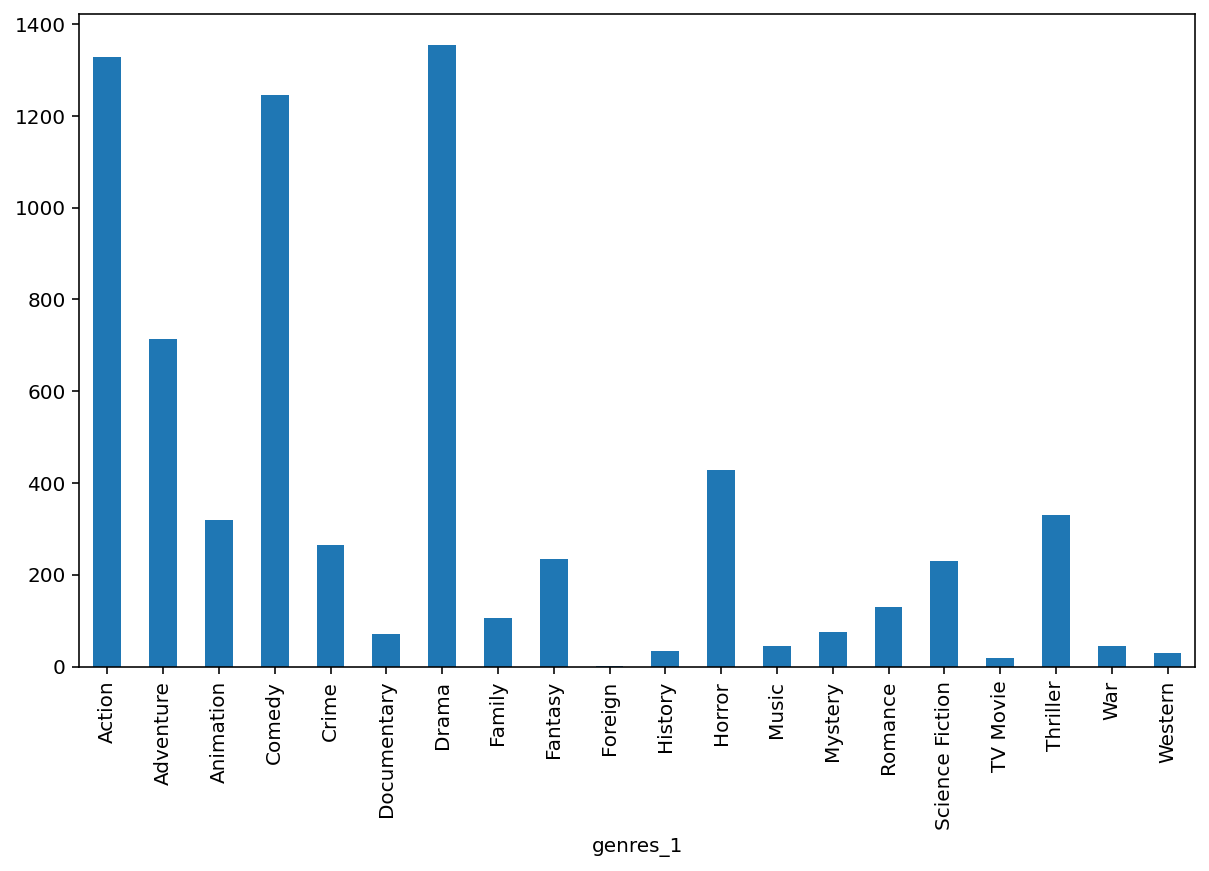

In [30]:
genre_popularity.plot(kind='bar');

We can see Action and Drama are the most popular, followed by Comedy while TV movie and Western are the least popular.

We will try this genre_2

In [31]:
genre_popularity_2 = movie_df.groupby(by=["genres_2"])["popularity"].sum()
genre_popularity_2

genres_2
Action              588.364134
Adventure           605.855468
Animation           187.697575
Comedy              608.963641
Crime               361.614127
Documentary          15.540491
Drama               995.132912
Family              312.616381
Fantasy             333.884645
Foreign              12.304703
History              82.627930
Horror              210.529044
Music                81.021458
Mystery             155.942059
None               1051.227269
Romance             410.575540
Science Fiction     268.679246
TV Movie              5.832098
Thriller            656.291251
War                  33.147037
Western              23.995068
Name: popularity, dtype: float64

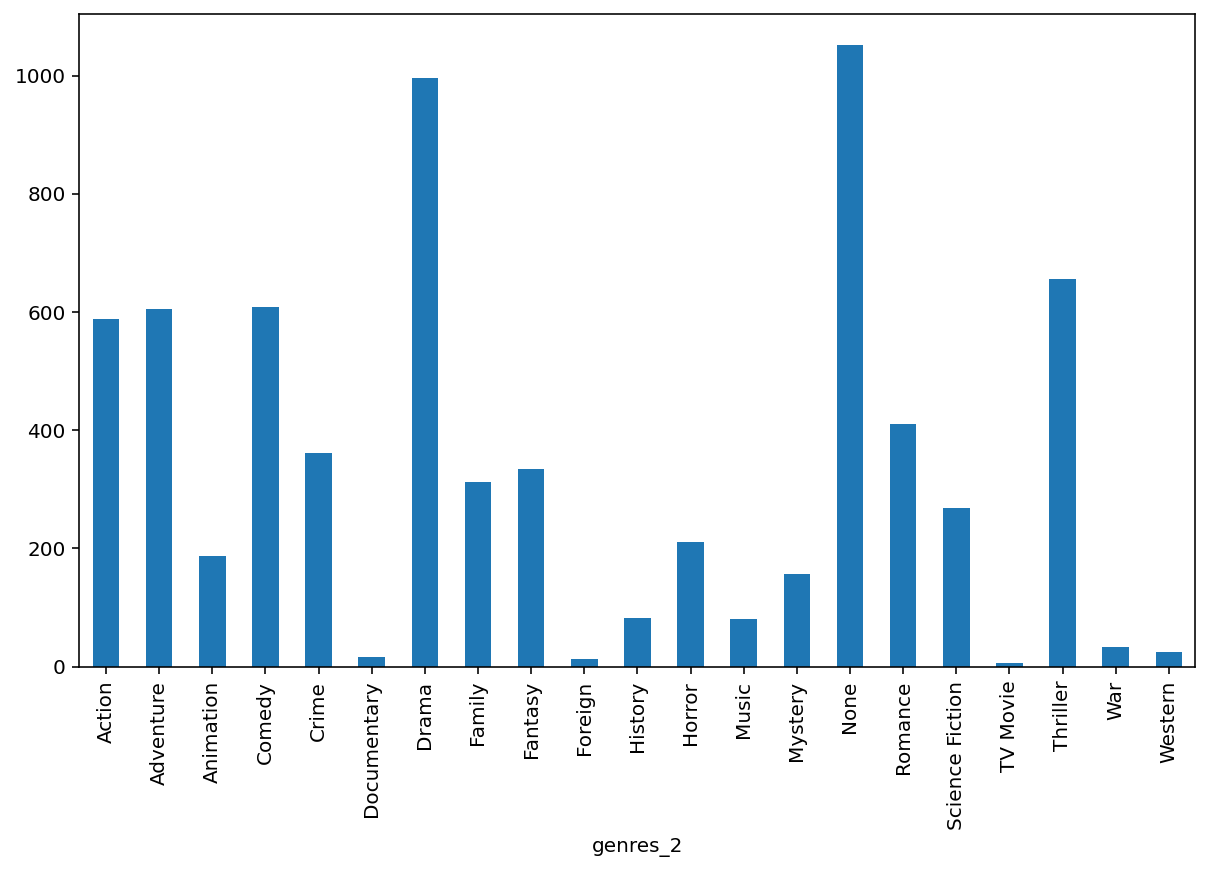

In [32]:
genre_popularity_2.plot(kind='bar');

Here, we can see Drama is the most popular in terms of second genre (Note that None are movies without second Genre). While TV Movie is still the least popular here.

Question 4: Which Genre grossed the highest profits

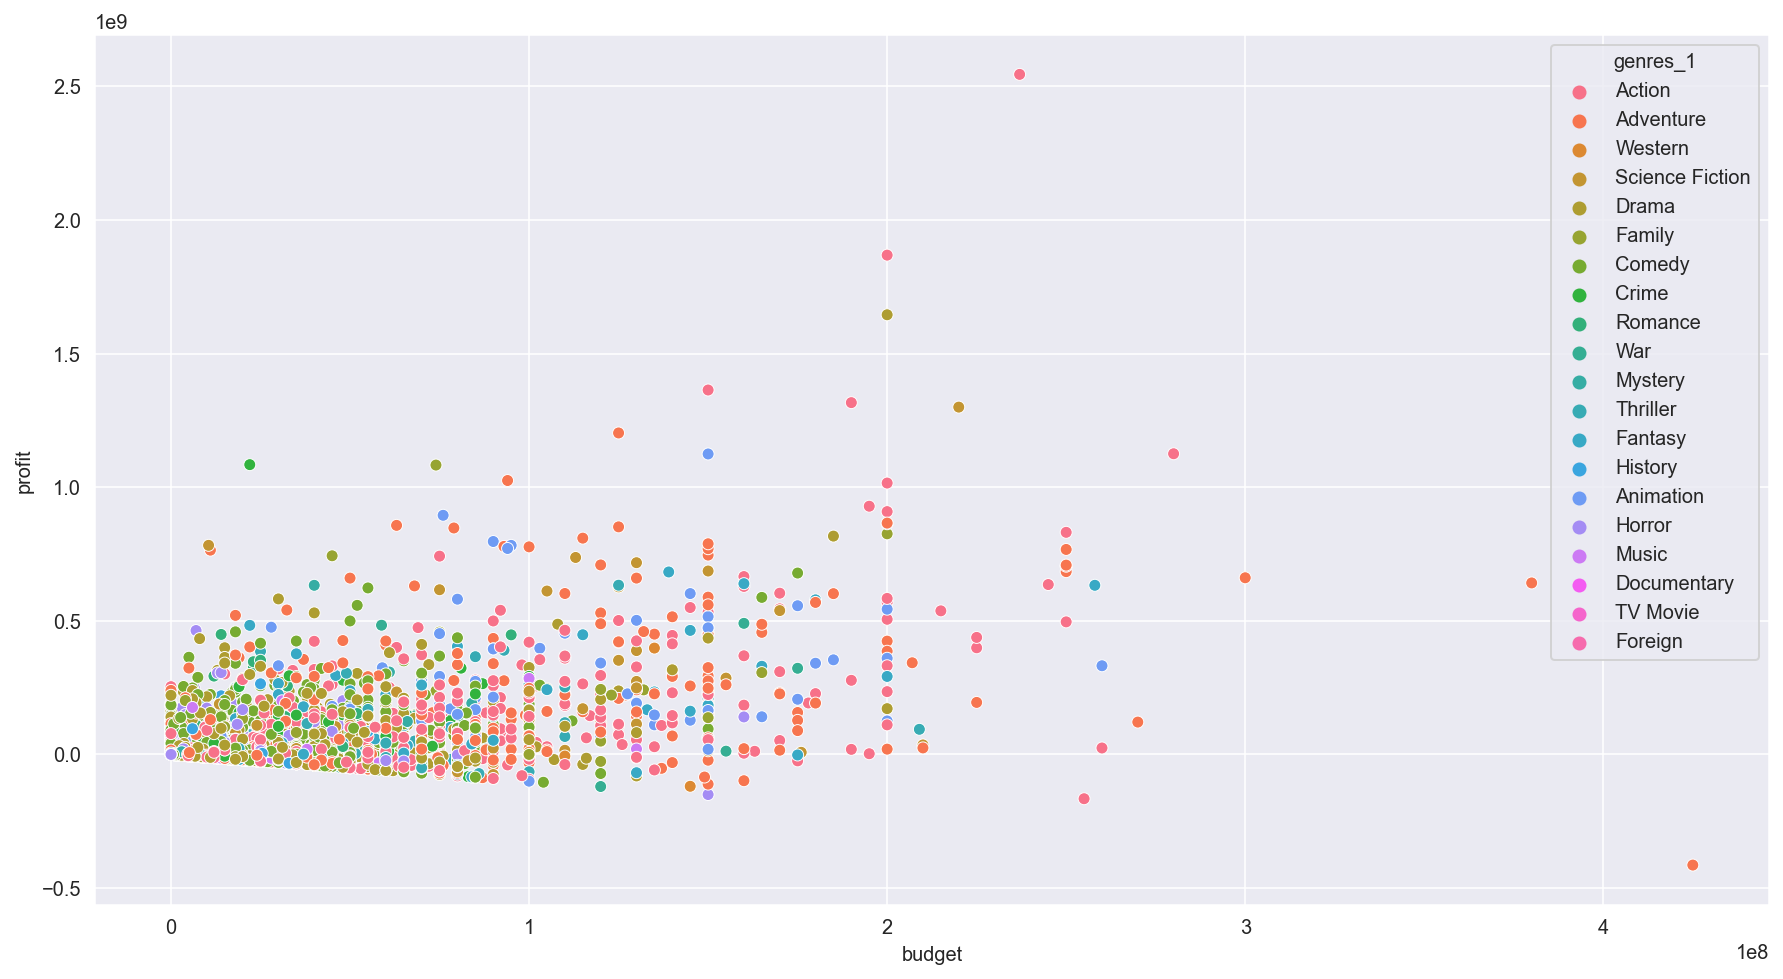

In [33]:
# first, plottimg budget and profit scatterplot by Gneres_1
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')
sns.scatterplot(
    data=movie_df,
    x="budget", y="profit", hue='genres_1');

From the scatter plot above, we can see that Action, Adventure and Drama are grossing bigger profits than the rests. We will go ahead show the values of each

In [34]:
genre_profit = movie_df.groupby(by=["genres_1"])["profit", "budget"].sum()
genre_profit

/var/folders/c9/8lp3ylpd2sl45tswp801h7bc0000gp/T/ipykernel_7015/3089209542.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_profit = movie_df.groupby(by=["genres_1"])["profit", "budget"].sum()


,profit,budget
genres_1,,
Action,57418138353,39187934492
Adventure,49530172479,23576834285
Animation,20138062480,8658985733
Comedy,43884561239,24067900257
Crime,7588577976,5118189502
Documentary,650637984,166061440
Drama,36341230673,25326070351
Family,6216564578,2637888200
Fantasy,11925896473,6378051854


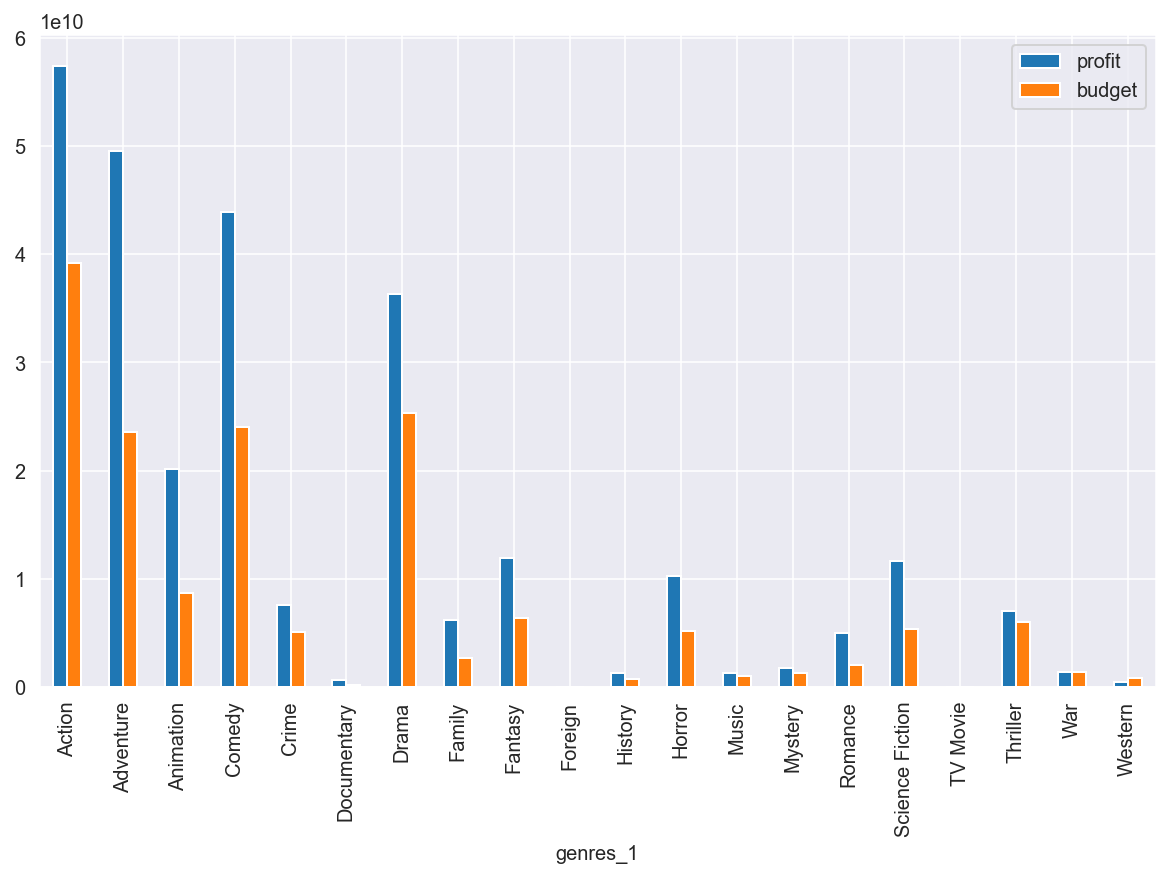

In [35]:
genre_profit.plot(kind='bar');

Question 5: Top casts to feature in lots of genres

In [36]:
cast_genre = movie_df[['genres_1','cast_1']].groupby('cast_1') .count().sort_values(by='genres_1', ascending=False).head(10)
cast_genre

,genres_1
cast_1,
Nicolas Cage,50
Robert De Niro,42
Bruce Willis,39
Clint Eastwood,38
Johnny Depp,37
Tom Hanks,37
Sylvester Stallone,36
Steven Seagal,35
Jean-Claude Van Damme,35


<AxesSubplot:xlabel='cast_1'>

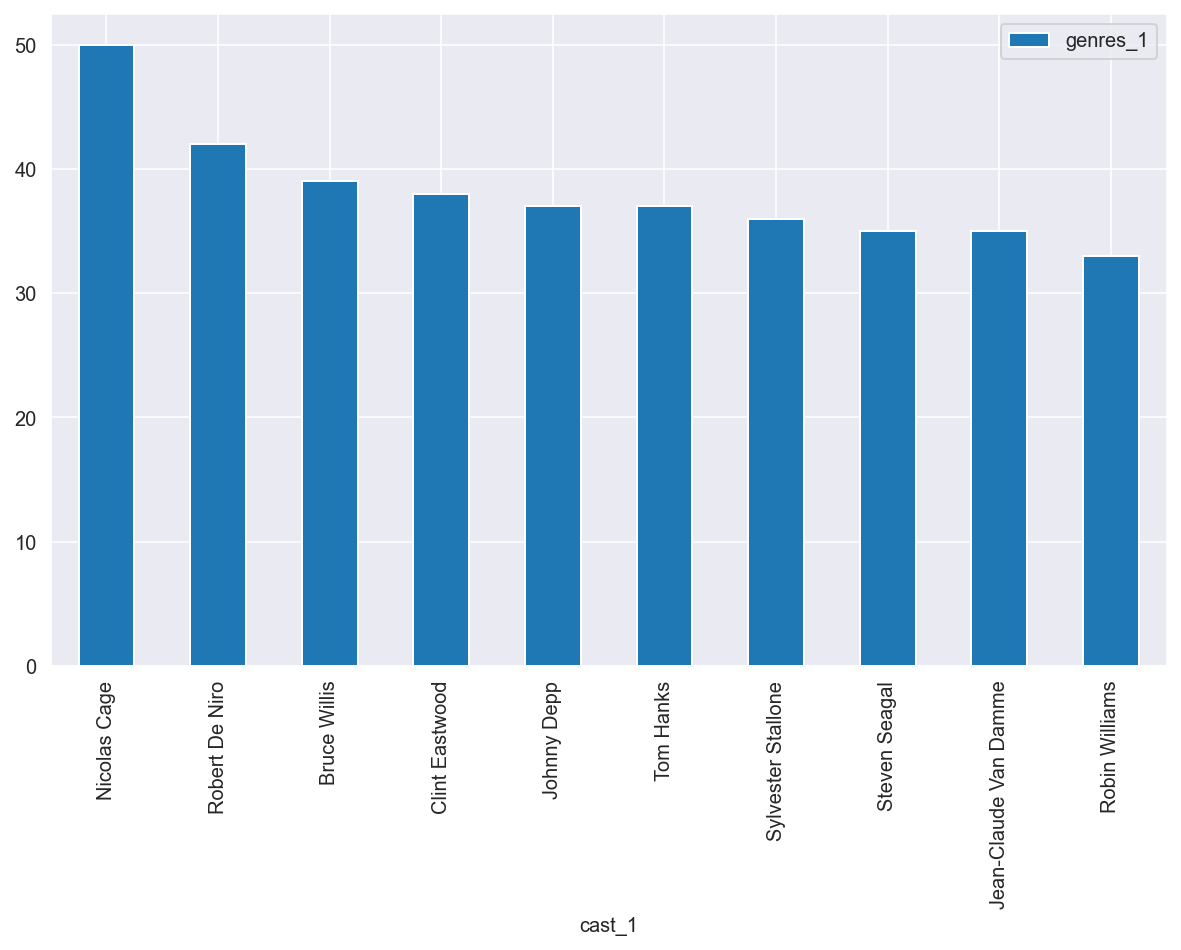

In [37]:
cast_genre.plot(kind='bar')

Nicolas Cage has featured in more diverse genres of movies than any other cast.

## The End